# Import statements

In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
sns.set_style('ticks')
font = {
    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
import utils

# Parse and plot spot instance prices

In [3]:
from datetime import datetime
import os

import pylab
def plot_prices_legend(labels, output_filename=None):
    
    fig = pylab.figure()
    figlegend = pylab.figure(figsize=(9, 1))
    
    ax = fig.add_subplot(111)
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    markers = ['o', 's', '^', 'P', 'D', 'X']
    lines = []
    for i, (color, marker) in enumerate(zip(colors, markers)):
        line = ax.plot(range(5),
                       range(5),
                       marker=marker,
                       color=color,
                       linewidth=3,
                       markersize=15)
        lines.append(line)
        
    figlegend.legend(
        [line[0] for line in lines],
        labels,
        loc='center',
        ncol=len(labels) // 2,
        frameon=False,
        labelspacing=0.2,
        columnspacing=0.6, handlelength=1.4,)

    if output_filename is not None:
        figlegend.savefig(output_filename)

def plot_prices(all_per_instance_type_spot_prices,
                output_directory=None):
    all_timestamps = []
    for instance_type in all_per_instance_type_spot_prices[0]:
        all_timestamps.extend(
            [x['Timestamp']
             for x in all_per_instance_type_spot_prices[0][instance_type]])
    all_timestamps.sort()
    first_timestamp = all_timestamps[0]
    
    instance_types = ['p2.xlarge', 'p2.8xlarge', 'p2.16xlarge',
                      'p3.2xlarge', 'p3.8xlarge', 'p3.16xlarge']
    
    availability_zones = [x['AvailabilityZone']
                          for x in all_per_instance_type_spot_prices[0]['p2.xlarge']]
    availability_zones = sorted(list(set(availability_zones)))
    
    for instance_type in instance_types:
        plt.figure(figsize=(6.5, 3))
        ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
        print(instance_type)

        markers = ['o', 's', '^', 'P', 'D', 'X']
        for per_instance_type_spot_prices in all_per_instance_type_spot_prices:

            if instance_type not in per_instance_type_spot_prices:
                continue
            
            num_lines = 0
            for i, availability_zone in enumerate(availability_zones):
                per_instance_type_spot_prices[instance_type].sort(
                    key=lambda x: x['Timestamp'])
                # Plot spot prices for this availability zone only.
                spot_prices = [float(x['SpotPrice'])
                               for x in per_instance_type_spot_prices[instance_type]
                               if x['AvailabilityZone'] == availability_zone]
                # Zero-center timestamps with respect to first timestamp.
                timestamps = [
                    (x['Timestamp']
                     - first_timestamp).total_seconds() / (3600 * 24)
                    for x in per_instance_type_spot_prices[instance_type]
                    if x['AvailabilityZone'] == availability_zone]

                spot_prices_no_duplicates = []
                timestamps_no_duplicates = []
                last_timestamp = None
                for (spot_price, timestamp) in zip(spot_prices, timestamps):
                    if timestamp != last_timestamp:
                        spot_prices_no_duplicates.append(spot_price)
                        timestamps_no_duplicates.append(timestamp)
                    last_timestamp = timestamp
                ax.plot(timestamps_no_duplicates, spot_prices_no_duplicates,
                        label=availability_zone,
                        marker=markers[i], markevery=5)
                num_lines += 1

        ax.set_ylabel("Price ($/hr)")
        ax.set_xlabel("Time (days)")
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
        sns.despine()

        # Save graph to output file.
        if output_directory is not None:
            output_filename = os.path.join(output_directory,
                                           instance_type.replace(".", "_") + ".pdf")
            with PdfPages(output_filename) as pdf:
                pdf.savefig(bbox_inches='tight')
        
        # Draw legend on displayed graph.
        if len(availability_zones) % 2 == 0:
            ncol = num_lines // 2
        else:
            ncol = num_lines // 2 + 1
        if ncol < 3:
            ncol = 3
        leg = plt.figlegend(
            loc='center',
            ncol=ncol,
            frameon=False,
            labelspacing=0.2,
            columnspacing=0.6, handlelength=1.4,)
        bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
        y_offset = 0.7
        bb.y0 += y_offset
        bb.y1 += y_offset
        leg.set_bbox_to_anchor(bb, transform=ax.transAxes)
        plt.show()
    
    plot_legend = False # Set to True to generate PDF with legend.
    if plot_legend and output_directory is not None:
        plot_prices_legend(availability_zones,
                           os.path.join(output_directory, "legend.pdf"))

p2.xlarge


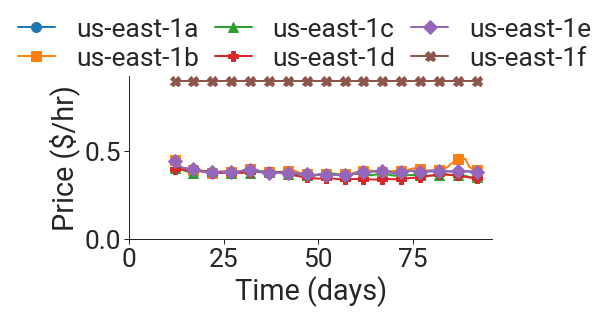

p2.8xlarge


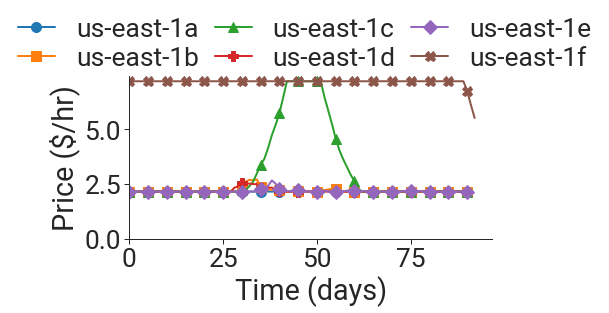

p2.16xlarge


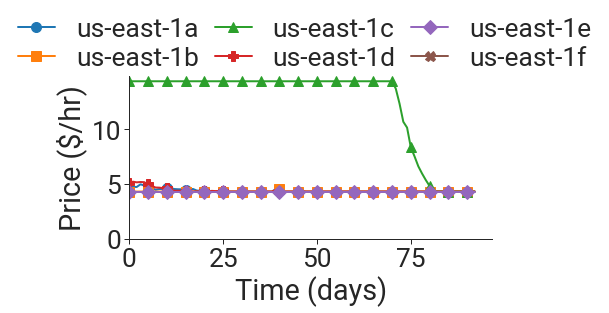

p3.2xlarge


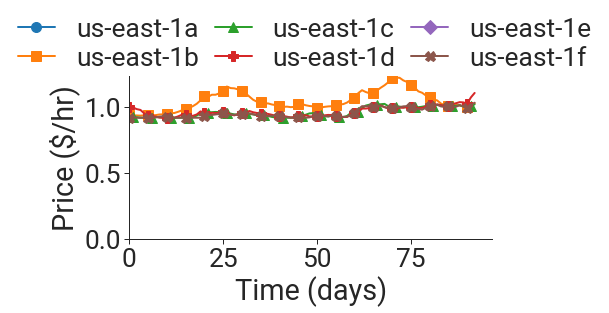

p3.8xlarge


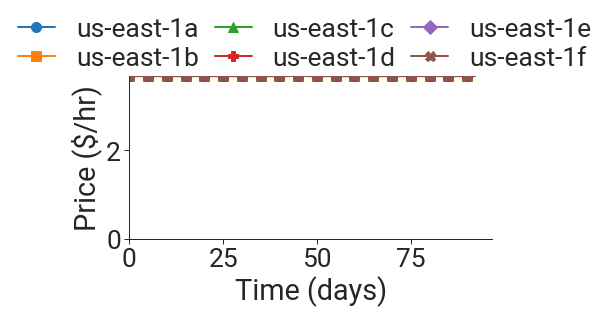

p3.16xlarge


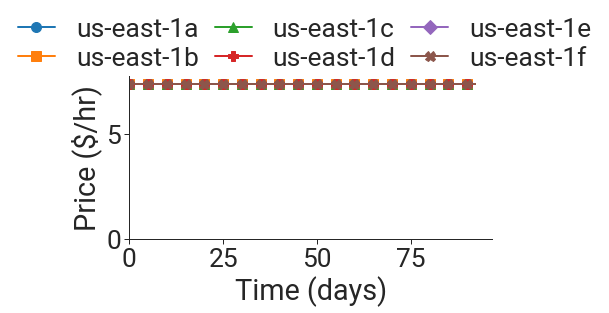

In [4]:
plot_prices([utils.read_aws_prices("../logs/aws/cost/us-east-1", summary=False)],
            output_directory="../graphs/aws/cost/us_east_1/")

p2.xlarge


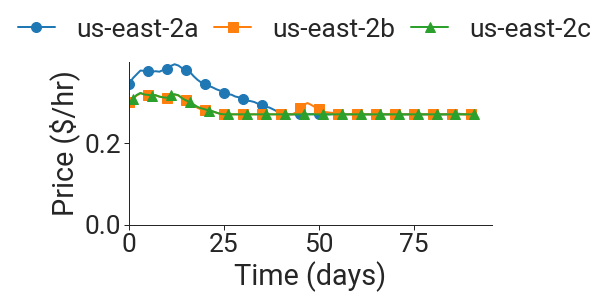

p2.8xlarge


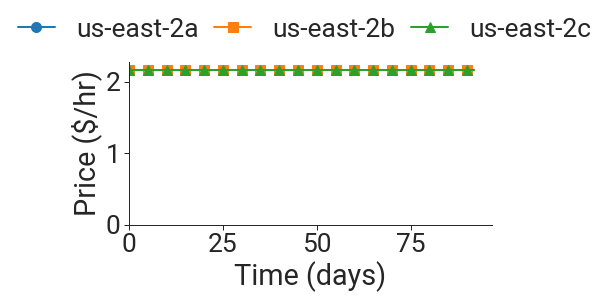

p2.16xlarge


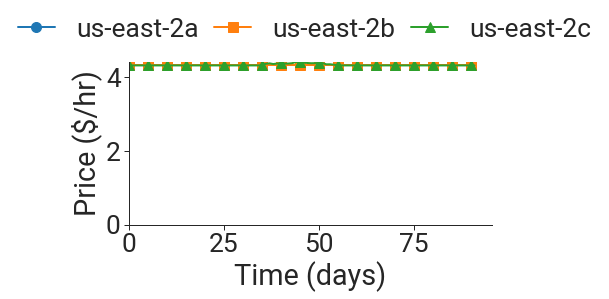

p3.2xlarge


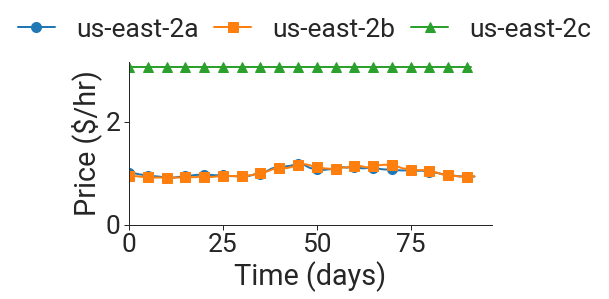

p3.8xlarge


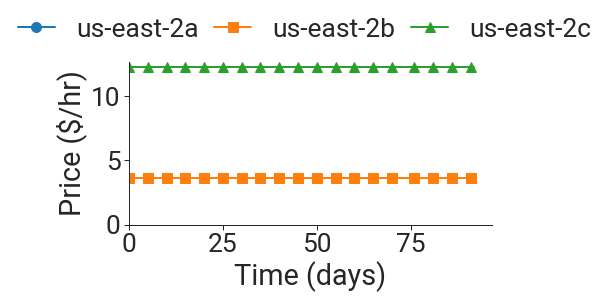

p3.16xlarge


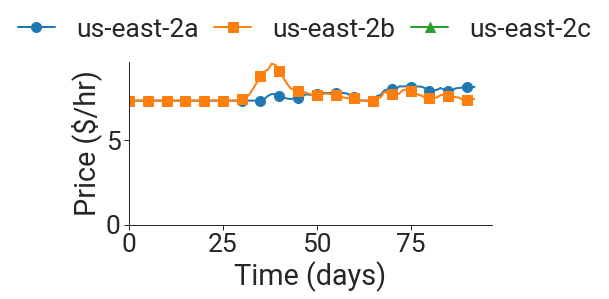

In [5]:
plot_prices([utils.read_aws_prices("../logs/aws/cost/us-east-2", summary=False)],
            output_directory="../graphs/aws/cost/us_east_2/")

p2.xlarge


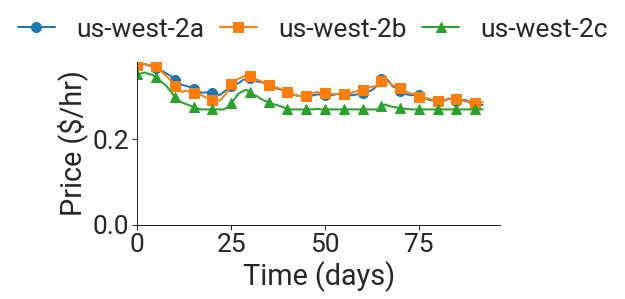

p2.8xlarge


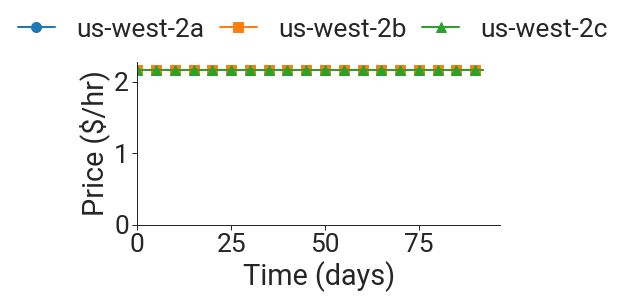

p2.16xlarge


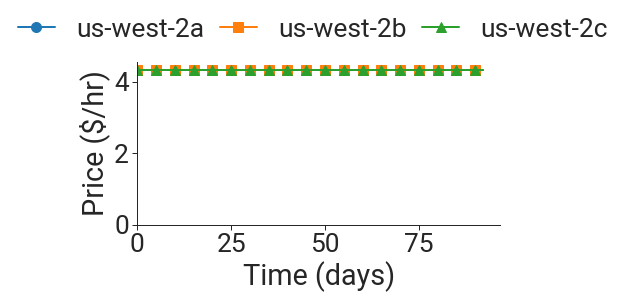

p3.2xlarge


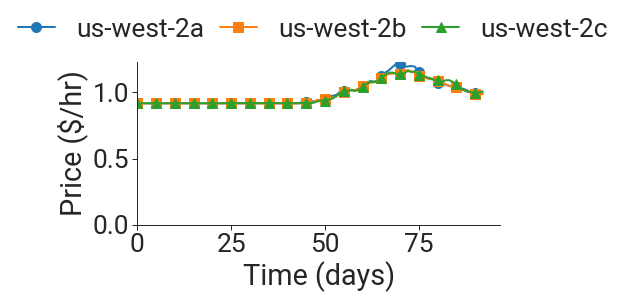

p3.8xlarge


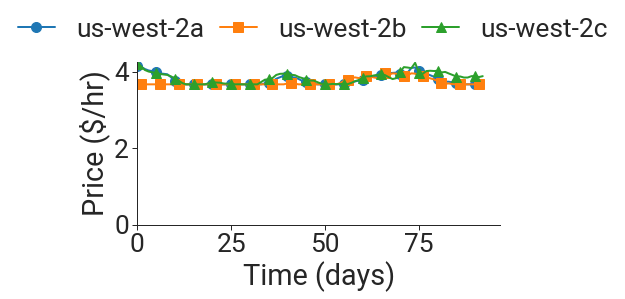

p3.16xlarge


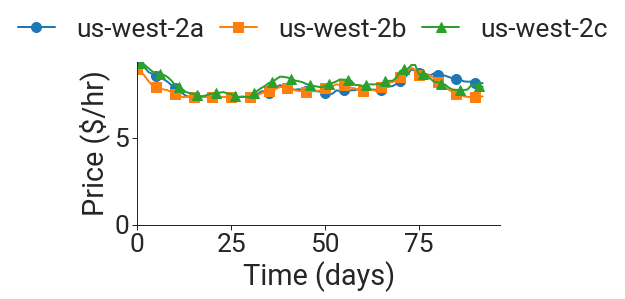

In [6]:
plot_prices([utils.read_aws_prices("../logs/aws/cost/us-west-2", summary=False)],
            output_directory="../graphs/aws/cost/us_west_2/")

p2.xlarge


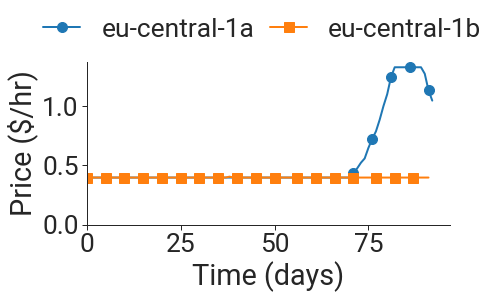

p2.8xlarge


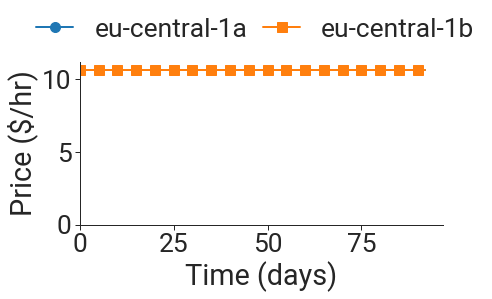

No handles with labels found to put in legend.


p2.16xlarge


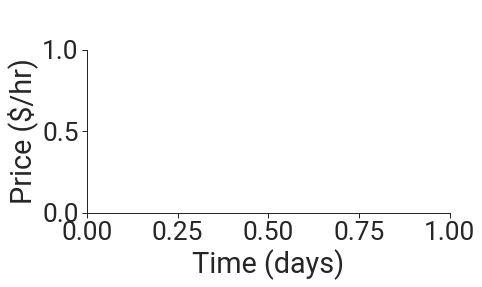

p3.2xlarge


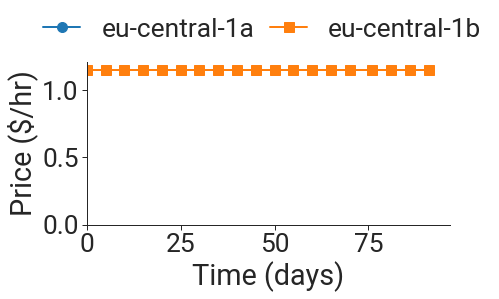

p3.8xlarge


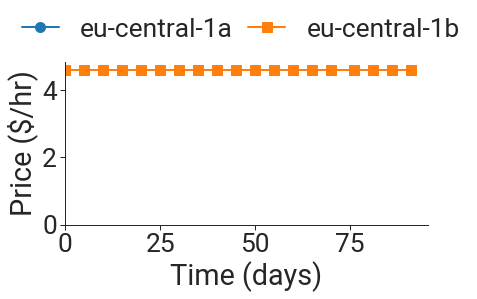

p3.16xlarge


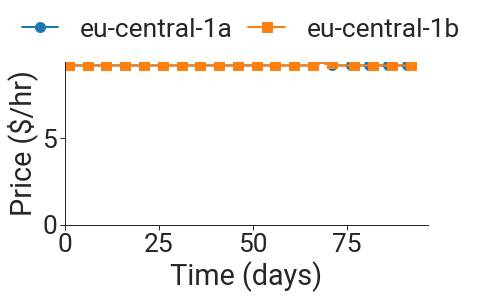

In [7]:
plot_prices([utils.read_aws_prices("../logs/aws/cost/eu-central-1", summary=False)],
            output_directory="../graphs/aws/cost/eu_central_1/")

p2.xlarge


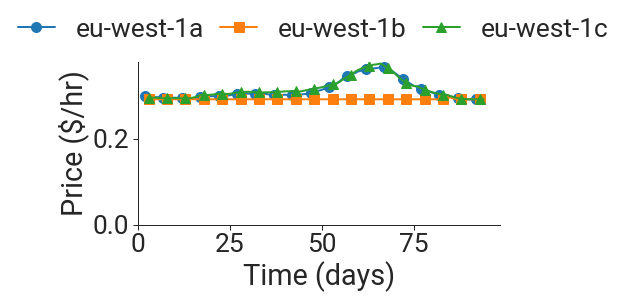

p2.8xlarge


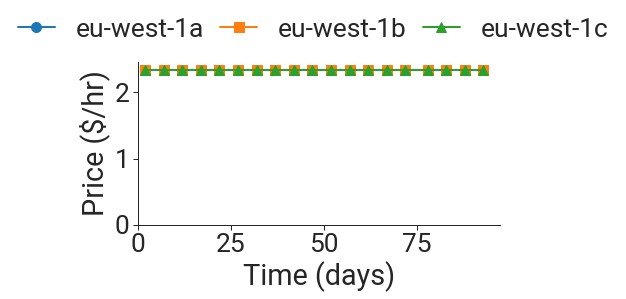

p2.16xlarge


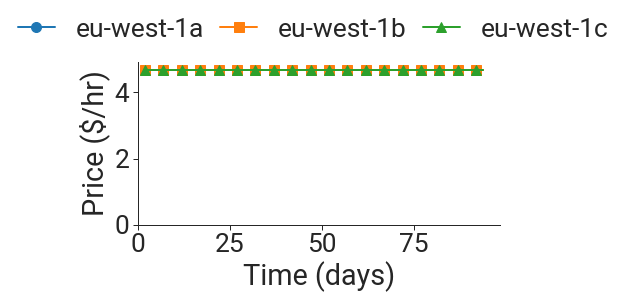

p3.2xlarge


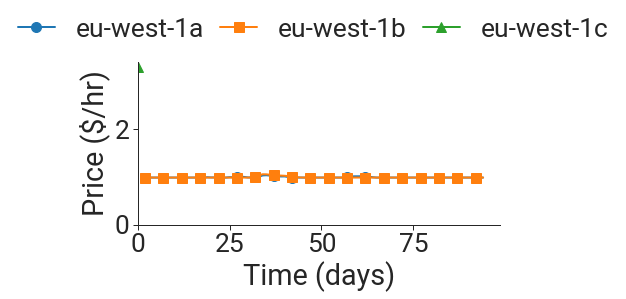

p3.8xlarge


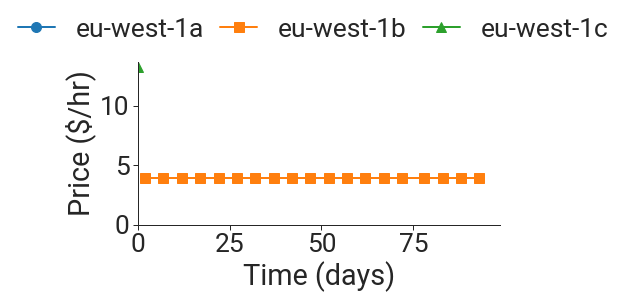

p3.16xlarge


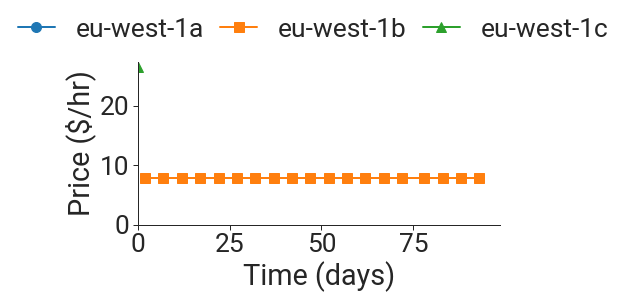

In [8]:
plot_prices([utils.read_aws_prices("../logs/aws/cost/eu-west-1", summary=False)],
            output_directory="../graphs/aws/cost/eu_west_1/")

# Plot per-GPU instance price

In [9]:
from datetime import datetime

def plot_price_per_unit_time(per_instance_type_spot_prices,
                             output_directory=None):
    aws_instances = {
        "p2.xlarge": ("k80", 1),
        "p2.8xlarge": ("k80", 8),
        "p2.16xlarge": ("k80", 16),
        "p3.2xlarge": ("v100", 1),
        "p3.8xlarge": ("v100", 4),
        "p3.16xlarge": ("v100", 8),
    }
    
    all_timestamps = []
    for instance_type in per_instance_type_spot_prices:
        all_timestamps.extend(
            [x['Timestamp']
             for x in per_instance_type_spot_prices[instance_type]])
    all_timestamps.sort()
    first_timestamp = all_timestamps[0]
    
    for master_gpu_type in ["k80", "v100"]:
        print(master_gpu_type)
    
        plt.figure(figsize=(12.5, 3))
        ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)

        markers = ['o', 's', '^', 'p']
        i = 0
        for instance_type in ["p2.xlarge", "p2.8xlarge", "p2.16xlarge",
                              "p3.2xlarge", "p3.8xlarge", "p3.16xlarge"]:

            availability_zones = [x['AvailabilityZone']
                                  for x in per_instance_type_spot_prices[instance_type]]
            (gpu_type, num_gpus) = aws_instances[instance_type]
            
            if gpu_type != master_gpu_type:
                continue

            for availability_zone in sorted(list(set(availability_zones)))[:1]:
                per_instance_type_spot_prices[instance_type].sort(
                    key=lambda x: x['Timestamp'])
                spot_prices = [float(x['SpotPrice']) / num_gpus
                               for x in per_instance_type_spot_prices[instance_type]
                               if x['AvailabilityZone'] == availability_zone]
                timestamps = [
                    (x['Timestamp']
                     - first_timestamp).total_seconds() / (3600 * 24)
                    for x in per_instance_type_spot_prices[instance_type]
                    if x['AvailabilityZone'] == availability_zone]
                spot_prices_no_duplicates = []
                timestamps_no_duplicates = []
                last_timestamp = None
                for (spot_price, timestamp) in zip(spot_prices, timestamps):
                    if timestamp != last_timestamp:
                        spot_prices_no_duplicates.append(spot_price)
                        timestamps_no_duplicates.append(timestamp)
                    last_timestamp = timestamp
                ax.plot(timestamps_no_duplicates, spot_prices_no_duplicates,
                        marker=markers[i], label="%s" % (instance_type),
                        markevery=3)
                i += 1

        ax.set_ylabel("Per-GPU Price\n($/hr)")
        ax.set_xlabel("Time (days)")
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
        sns.despine()

        leg = plt.figlegend(ncol=3, frameon=False, labelspacing=0.25,
                            columnspacing=0.8, handlelength=1.5,
                            loc='upper center')

        bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
        y_offset = 0.13
        bb.y0 += y_offset
        bb.y1 += y_offset
        leg.set_bbox_to_anchor(bb, transform=ax.transAxes)
        
        if output_directory is not None:
            output_filename = os.path.join(output_directory,
                                           master_gpu_type + ".pdf")
            with PdfPages(output_filename) as pdf:
                pdf.savefig(bbox_inches='tight')

        plt.show()

k80


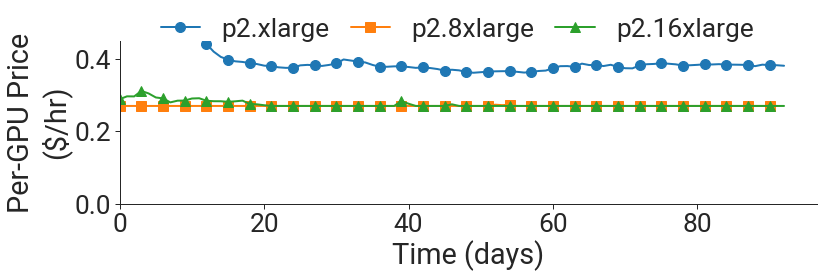

v100


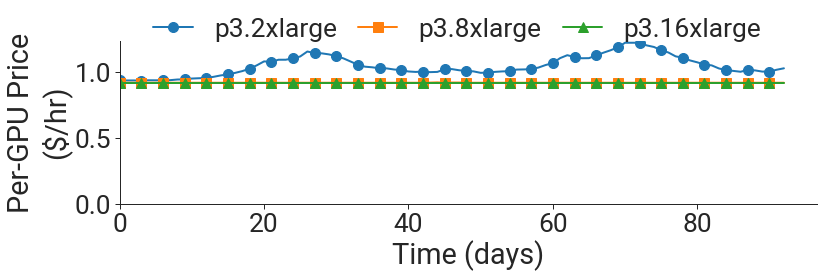

In [10]:
plot_price_per_unit_time(utils.read_aws_prices("../logs/aws/cost/us-east-1", summary=False),
                         output_directory="../graphs/aws/normalized_cost_per_gpu")

k80


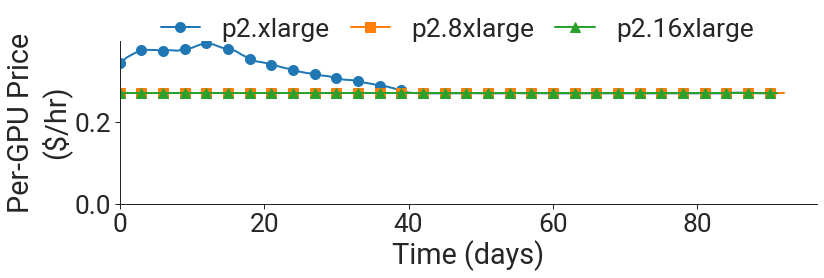

v100


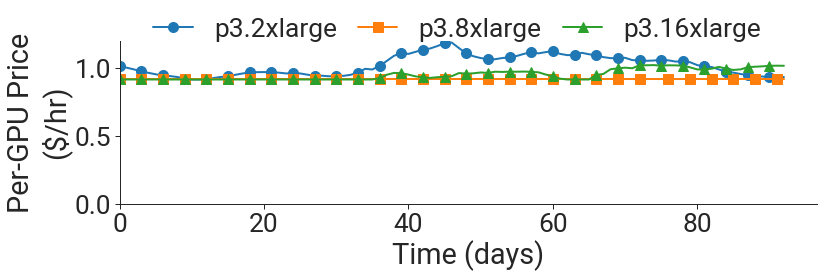

In [11]:
plot_price_per_unit_time(utils.read_aws_prices("../logs/aws/cost/us-east-2", summary=False),
                         output_directory="../graphs/aws/normalized_cost_per_gpu")

# Plot availability

In [12]:
import os

def read_persistent_log_files(directory):
    all_events = {}
    instances = {}
    for filename in os.listdir(directory):
        events = {}
        instance_ids_to_names = {}
        full_filepath = os.path.join(directory, filename)
        if not filename.startswith("persistent_"):
            continue
        with open(full_filepath, 'r') as f:
            for line in f:
                line = line.strip()
                regexes = [
                    r'\[(.*)\] Created instance (.*) with (\d+) GPU\(s\) of type (.*) in zone (.*)',
                    r'\[(.*)\] Instance (.*) not running in zone (.*)',
                ]
                if re.search(regexes[0], line):
                    m = re.search(regexes[0], line)
                    timestamp = datetime.strptime(m.group(1),
                                                  '%Y-%m-%dT%H:%M:%S.000Z')
                    instance_id = m.group(2)
                    num_gpus = int(m.group(3))
                    gpu_type = m.group(4)
                    zone = m.group(5)
                    
                    instance_name = (gpu_type, num_gpus, zone)
                    
                    if instance_name not in events:
                        events[instance_name] = []
                    events[instance_name].append([timestamp, None])
                    instances[instance_name] = (num_gpus, gpu_type, zone)
                    instance_ids_to_names[instance_id] = instance_name
                elif re.search(regexes[1], line):
                    m = re.search(regexes[1], line)
                    timestamp = datetime.strptime(m.group(1),
                                                  '%Y-%m-%dT%H:%M:%S.000Z')
                    instance_id = m.group(2)
                    instance_name = instance_ids_to_names[instance_id]
                    zone = m.group(3)
                    if instance_name in events and events[instance_name][-1][1] is None:
                        events[instance_name][-1][1] = timestamp
        for instance_name in events:
            if events[instance_name][-1][1] is None:
                events[instance_name][-1][1] = timestamp
        all_events[filename] = events
    return all_events, instances

In [13]:
def plot_timeline(all_events, instances,
                  output_directory=None):
    gpu_type_mapping = {
        "k80": "K80",
        "p100": "P100",
        "v100": "V100",
    }

    for filename, events in all_events.items():        
        all_timestamps = []
        for instance_type in events:
            all_timestamps.extend(
                [x[0] for x in events[instance_type]])
        all_timestamps.sort()
        first_timestamp = all_timestamps[0]

        instance_names = list(events.keys())
        instance_names.sort(key=lambda x: instances[x])
        num_instance_types = 0
        for instance_name in instance_names:
            if len(events[instance_name]) > 0:
                num_instance_types += 1
        print("Number of instance types: %d" % num_instance_types)

        plt.figure(figsize=(10, (0.7 * num_instance_types) - 0.5))
        ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)

        worker_id_to_type_mapping = {}
        instance_id = 0
        for instance_name in instance_names:
            if len(events[instance_name]) > 0:
                # Each event has a start and end timestamp.
                for [start_timestamp, end_timestamp] in events[instance_name]:
                    
                    if end_timestamp is not None:
                        ax.plot([(start_timestamp - first_timestamp).total_seconds() / (24 * 3600),
                                 (end_timestamp - first_timestamp).total_seconds() / (24 * 3600)],
                                [instance_id, instance_id],
                                linewidth=5, c="C%d" % (instance_id % 10),
                                marker='|', markersize=22)
                instance_id += 1

        ax.set_yticks(list(range(len(instance_names))))
        ax.set_yticklabels(["%dx%s, %s" % (
            instances[x][0], gpu_type_mapping[x[0]],
            instances[x][2].replace("us-east-1", "us-east1-"))
            for x in instance_names])
        ax.set_xlabel("Time (days)")
        ax.set_ylabel("Instance")
        ax.set_xlim([0, 2.2])

        sns.despine()

        if output_directory is not None:
            output_filename = os.path.join(output_directory,
                                           filename.replace(".out", ".pdf"))
            with PdfPages(output_filename) as pdf:
                pdf.savefig(bbox_inches='tight')

        plt.show()

Number of instance types: 8


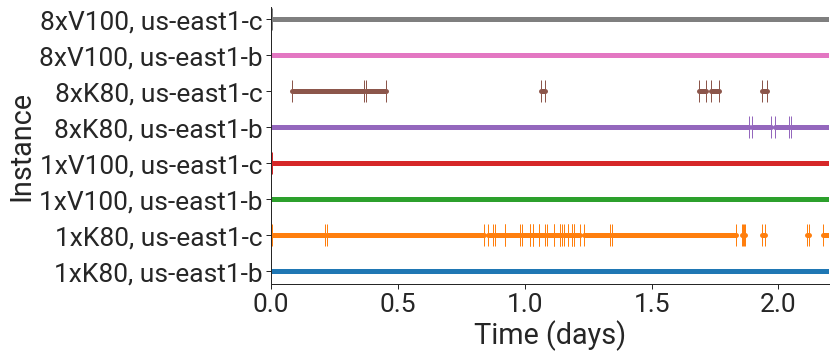

In [14]:
plot_timeline(*read_persistent_log_files("../logs/aws/availability"),
              output_directory="../graphs/aws/availability")

# Print cost reduction from on-demand to spot

In [15]:
spot_prices = utils.read_aws_prices("../logs/aws/cost/us-east-1", summary=True)
on_demand_prices = {'p2.xlarge': 0.9, 'p3.2xlarge': 3.06}
for instance_type in on_demand_prices:
    print(instance_type, "%.2f" % (on_demand_prices[instance_type] / spot_prices[instance_type][1]))

p2.xlarge 2.67
p3.2xlarge 3.33
